## Фреймворк PyTorch для разработки искусственных нейронных сетей

1.	Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре). Варианты изменений:  
a.	изменение слоёв и их количества;  
b.	изменение метода оптимизации;   
c.	изменение процесса обучения;  
d.	для продвинутых: преобразование данных. 

In [1]:
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:77% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch
import torchvision
from torch import nn 
from torch import optim
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms

In [4]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [6]:
transform_augment = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4)])

transform_normalize = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [7]:
# def to_categorical(y, num_classes):
#     """ 1-hot encodes a tensor """
#     return np.eye(num_classes, dtype='uint8')[y]

In [8]:
train_dataset = torchvision.datasets.CIFAR10(root='./data/', # путь куда будут скачиваться наши данные(если download=true), 
                                                                 # или где лежат наши данные(dowload=False)
                                             train=True, # говорим что используем датасет для обучения
                                             transform=transforms.Compose([transform_augment, transform_normalize]),
#                                              transform=transforms.ToTensor(), # важная строчка: здесь мы преобразуем данные
                                                                                # из датасета в формат тензоров из торч
                                             download=False)

In [9]:
image, label = train_dataset[1]
print(image.size())
print(label)

torch.Size([3, 32, 32])
9


In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [11]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_normalize)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10,
                                         shuffle=False)

Files already downloaded and verified


In [12]:
class_names = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.bn1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn2 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3) # Drop 20% of the units from the layer
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.bn2(x)
        x = x.view(-1, 16 * 5 * 5)
        x = self.dropout(x)
                
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [14]:
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [16]:
for epoch in range(15):  # 15 эпох 
    
    running_loss = 0.0 # Для вывода процесса обучения
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Обнуляем градиент
        optimizer.zero_grad()
    
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.261
[1,   601] loss: 0.233
[2,     1] loss: 0.001
[2,   301] loss: 0.219
[2,   601] loss: 0.211
[3,     1] loss: 0.001
[3,   301] loss: 0.206
[3,   601] loss: 0.200
[4,     1] loss: 0.001
[4,   301] loss: 0.195
[4,   601] loss: 0.194
[5,     1] loss: 0.001
[5,   301] loss: 0.188
[5,   601] loss: 0.187
[6,     1] loss: 0.001
[6,   301] loss: 0.181
[6,   601] loss: 0.180
[7,     1] loss: 0.001
[7,   301] loss: 0.177
[7,   601] loss: 0.177
[8,     1] loss: 0.001
[8,   301] loss: 0.174
[8,   601] loss: 0.173
[9,     1] loss: 0.001
[9,   301] loss: 0.172
[9,   601] loss: 0.170
[10,     1] loss: 0.000
[10,   301] loss: 0.169
[10,   601] loss: 0.168
[11,     1] loss: 0.001
[11,   301] loss: 0.167
[11,   601] loss: 0.165
[12,     1] loss: 0.001
[12,   301] loss: 0.163
[12,   601] loss: 0.166
[13,     1] loss: 0.000
[13,   301] loss: 0.164
[13,   601] loss: 0.164
[14,     1] loss: 0.001
[14,   301] loss: 0.163
[14,   601] loss: 0.163
[15,     1] loss: 0

In [17]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:      cat  ship   car plane  frog  frog   dog  frog   cat truck


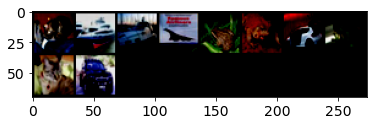

In [18]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % class_names[labels[j]] for j in range(10)))

_, predicted = torch.max(outputs, 1)
print('Predicted:   ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(10)))

In [19]:
# print(outputs)

2.	Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.

In [20]:
linear = nn.Linear(2, 2)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.001)
x = Variable(torch.randn(2), requires_grad = True)
y = Variable(torch.randn(2), requires_grad = False)
print("x=", x, 'y=', y)

for epoch in range(1000):
    optimizer.zero_grad()
    pred = linear(x)
    loss = criterion(pred, y)

    if epoch % 100 == 0:
        print('epoch: ', epoch, 'loss: ', loss.item())
    loss.backward()
    optimizer.step()
    
print('pred=', pred)

x= tensor([-0.9598,  0.2482], requires_grad=True) y= tensor([0.1758, 0.4111])
epoch:  0 loss:  1.0628606081008911
epoch:  100 loss:  0.7146204710006714
epoch:  200 loss:  0.4804796576499939
epoch:  300 loss:  0.32305365800857544
epoch:  400 loss:  0.21720723807811737
epoch:  500 loss:  0.1460406631231308
epoch:  600 loss:  0.09819137305021286
epoch:  700 loss:  0.06601956486701965
epoch:  800 loss:  0.04438868165016174
epoch:  900 loss:  0.029845021665096283
pred= tensor([0.1533, 0.2117], grad_fn=<AddBackward0>)


3.	Переписать эту программу на PyTorch: 

![image](1.jpg)

Не забудьте про реализацию функции forward! 

In [21]:
class Net2(nn.Module): 
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.l2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.l2(x)
        return F.log_softmax(x)
    
net2 = Net2().to('cpu')

In [22]:
print(net2)

Net2(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (l2): Linear(in_features=128, out_features=10, bias=True)
)


In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net2.parameters())